In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mVal_train = pd.read_csv("/Users/chenjiqing/Public/bladder cancer/Extended Deconvolution/Script/Autoencoder_Kmeans/mVals_161.csv")

mVal_train.head()

,cg00120423,cg00490406,cg00905101,cg00938163,cg01240432,cg01309511,cg01453469,cg01561719,cg01815076,cg01823541,...,cg25518302,cg25693439,cg26261002,cg26295541,cg26418880,cg26436927,cg26821758,cg27262850,cg27314686,cg27528971
0,2.772213,-0.357180,-1.874418,3.969904,2.600351,-2.086137,-2.454501,-2.169805,-2.078128,-3.010737,...,-3.804770,-1.809027,-2.196729,-3.526672,-3.810276,1.259756,2.897851,-2.026000,-2.071414,2.806982
1,2.832737,0.095424,-1.112531,3.365419,2.825398,-1.422090,-2.521865,-0.829323,-2.412940,-2.991914,...,-4.013957,-0.765202,-1.190927,-2.920609,-3.611012,1.535344,3.110242,-1.125658,-1.352896,3.052501
2,2.737299,-0.078576,-1.125753,4.058961,2.927691,-1.201672,-2.971557,-0.765478,-3.519921,-3.074634,...,-3.728411,-0.623525,-1.012816,-3.060644,-3.440344,0.689165,3.235976,-0.915563,-1.075992,3.320132
3,4.137994,-0.165429,-0.663431,4.248981,4.173454,-0.794609,-2.674799,0.071558,-3.884949,-3.040357,...,-3.514557,-0.045185,-0.458889,-2.564653,-3.640060,2.511205,4.048556,-0.097202,-0.638801,4.249524
4,2.695566,0.634871,-1.054183,3.660966,2.618429,-1.255912,-1.777488,-0.726600,-3.151954,-2.964745,...,-3.963591,-0.967962,-1.488977,-3.255964,-3.967136,1.370213,2.741645,-1.010343,-1.262643,2.442747


In [47]:
tf.random.set_random_seed(123)
np.random.seed(123)

n_inputs = mVal_train.shape[1]

autoencoder = Sequential([
    Dense(128, activation='relu', input_shape = (n_inputs,), name = 'input_layer'),
    Dense(64, activation='relu'),
    Dense(20, activation='relu', name = 'latent_layer'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(n_inputs, activation='relu')
])

autoencoder.compile(optimizer='adam', loss = 'mse')
h = autoencoder.fit(mVal_train, mVal_train, epochs=50, verbose = 1)

Epoch 1/50
601/601 [==============================] - 1s 866us/sample - loss: 5.1330
Epoch 2/50
601/601 [==============================] - 0s 76us/sample - loss: 3.9845
Epoch 3/50
601/601 [==============================] - 0s 70us/sample - loss: 3.8848
Epoch 4/50
601/601 [==============================] - 0s 79us/sample - loss: 3.8757
Epoch 5/50
601/601 [==============================] - 0s 73us/sample - loss: 3.8733
Epoch 6/50
601/601 [==============================] - 0s 117us/sample - loss: 3.8719
Epoch 7/50
601/601 [==============================] - 0s 79us/sample - loss: 3.8694
Epoch 8/50
601/601 [==============================] - 0s 70us/sample - loss: 3.8140
Epoch 9/50
601/601 [==============================] - 0s 61us/sample - loss: 3.7672
Epoch 10/50
601/601 [==============================] - 0s 72us/sample - loss: 3.7608
Epoch 11/50
601/601 [==============================] - 0s 64us/sample - loss: 3.7584
Epoch 12/50
601/601 [==============================] - 0s 61us/sample - 

In [48]:
autoencoder.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 128)               20736     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
latent_layer (Dense)         (None, 20)                1300      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_30 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_31 (Dense)             (None, 161)               20769     
Total params: 60,725
Trainable params: 60,725
Non-trainable params: 0
__________________________________________________

In [49]:
encoder = Model(autoencoder.input, autoencoder.get_layer('latent_layer').output)
latent_pred = encoder.predict(mVal_train)

In [50]:
latent_pred.shape

(601, 20)

In [51]:
latent_pred

array([[4.7552404, 2.406224 , 0.       , ..., 0.6156801, 2.8391087,
        0.       ],
       [4.8336663, 3.2376726, 0.       , ..., 1.3431643, 2.020979 ,
        0.       ],
       [4.417291 , 3.0985303, 0.       , ..., 1.0068116, 1.0227698,
        0.       ],
       ...,
       [3.726744 , 2.0193555, 0.       , ..., 0.8869771, 0.6533387,
        0.       ],
       [2.974479 , 1.7878823, 0.       , ..., 0.8466855, 0.       ,
        0.       ],
       [3.5169954, 1.8282598, 0.       , ..., 0.8552815, 2.0254214,
        0.       ]], dtype=float32)

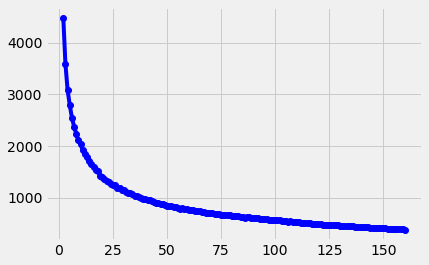

In [52]:
from sklearn.cluster import KMeans

tf.random.set_random_seed(123)
np.random.seed(123)

ssd = []
for i in range(2, n_inputs):
    km = KMeans(n_clusters=i).fit(latent_pred)
    ssd.append([int(i),km.inertia_])
ssd = np.array(ssd).reshape(-1,2)
plt.plot(ssd[:,0], ssd[:,1],'bo-')

In [53]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(latent_pred)
    score = silhouette_score(latent_pred, kmeans.labels_)
    silhouette_coefficients.append(score)

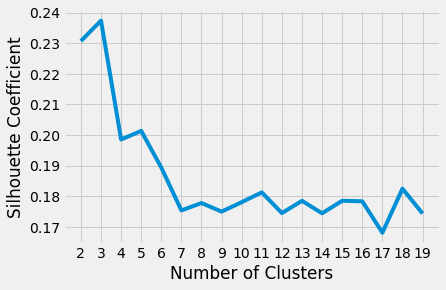

In [54]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [55]:
kmeans = KMeans(2)
kmeans.fit(latent_pred)
identified_clusters = kmeans.fit_predict(latent_pred)
identified_clusters

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
len(identified_clusters)

601

In [57]:
sum(identified_clusters)/len(identified_clusters)

0.39434276206322794

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(latent_pred)
prin_comp

array([[-1.2846913 , -0.2501202 ],
       [-0.06020603,  0.24193084],
       [ 0.49541613, -0.9084122 ],
       ...,
       [-0.54659194, -1.6451621 ],
       [-0.8571642 , -2.6991472 ],
       [-2.0452    , -1.339755  ]], dtype=float32)

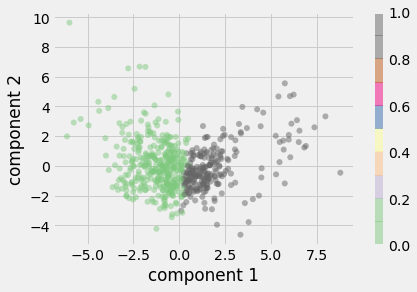

In [59]:
plt.scatter(prin_comp[:, 0], prin_comp[:, 1],
            c=identified_clusters, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [60]:
np.savetxt('test.csv', identified_clusters, delimiter=',')